# Problem Statement.
- Handwritten Digits recognizer.
- Train dataset consists of 42k rows with 785 cols.
- Test dataset consists of 28k rows with 784 cols.
- Computer Vision 

# 1. Import Libraries

In [47]:
import keras # Neural nets API
import numpy as np # Linear algebra
import pandas as pd # Data manipulation.

In [48]:
# Load data into train and test pandas dataframe
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [49]:
# view top 5 rows. 
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Label variable states the digit of each col

In [50]:
test_df.head() # view top 5 rows of test data.

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- No label we need to predict .

In [51]:
# shape of both train and test dataset.
train_df.shape ,test_df.shape

((42000, 785), (28000, 784))

In [52]:
# drop target (label) into new one
target=train_df["label"]
train_df.drop("label",axis=1,inplace=True)

In [53]:
train_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Label dropped

# 2. Normalize and Reshape data to visualize images format.

In [54]:
train_df=train_df/255 # normalize will work better with cnn
test_df=test_df/255 # from [0:255] to [0:1]

In [55]:
X_train=train_df.values.reshape(-1,28,28,1) # reshaping to keras convention (sample,height,width,color)
X_test=test_df.values.reshape(-1,28,28,1)

In [56]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(target,num_classes=10) # one hot encoding

In [46]:
y_train[0] # view first label after OHE.

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# 3. visualize by reshaping data.

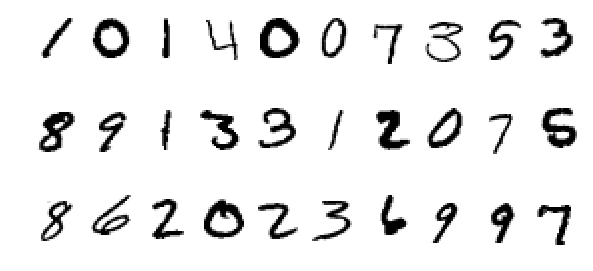

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis("off")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

# 4. Split train data for validation

In [44]:
# train test split data one for training one for vaildation.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.10,random_state=42)

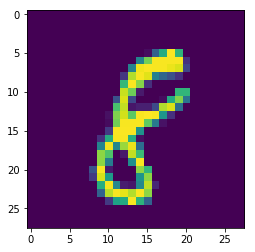

In [37]:
plt.imshow(X_train[0].reshape((28,28))) # plot

In [38]:
y_train[0] # result for above plot.

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# 5. Model building.


### Network Parameters:

> - Batch Size - Number of rows from the input data to use it one iteratation from the training purpose  
> - Num Classes - Total number of possible classes in the target variable  
> - Epochs - Total number of iterations for which cnn model will run.

In [41]:
batch_size=128
num_classes=10
epochs=20
inputshape=(28,28,1)

In [47]:
from keras.models import Sequential # import sequential convention so we can add layer after other.
import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization
model=Sequential()

# add first convolutional layer.
model.add(Conv2D(32,kernel_size=(5,5),activation="relu",input_shape=inputshape))
# add second convolutional layer
model.add(Conv2D(64,(3,3),activation="relu"))
          
# add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(5,5),activation="relu"))
# add second convolutional layer
model.add(Conv2D(128,(3,3),activation="relu"))

# add batch normalization
model.add(BatchNormalization())
# add one drop layer
model.add(Dropout(0.25))

# add flatten layer
model.add(Flatten())

# add dense layer
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
          
# add another dropout layer
model.add(Dropout(0.25))

# add dense layer
model.add(Dense(num_classes, activation='softmax'))

In [50]:
# complile the model and view its architecture
model.compile(loss="categorical_crossentropy",  optimizer="Adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [ ]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.00001)
checkpoint = ModelCheckpoint('save_weights.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

In [ ]:
# train model
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=callbacks)
accuracy=model.evaluate(X_test,y_test)

In [ ]:
pred = model.predict_classes(test)
res = pd.DataFrame({"ImageId":list(range(1,28001)),"Label":pred})
res.to_csv("output.csv", index = False)